In [1]:
import os
import scipy
import pandas as pd
pd.options.display.max_rows = 10
pd.options.display.float_format = '${:,.2f}'.format
import numpy as np
import requests
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pickle
plt.style.use('seaborn')
%matplotlib inline

In [2]:
def scrape_data(url):
    try:
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "html5lib")
        return soup
    except:
        print("Data is unavailable.")

In [3]:
soup = scrape_data('https://www.wholesalesolar.com/list-grid-tie-packages')

In [4]:
soup

<!DOCTYPE html>
<html lang="en-US"><head><link href="https://images.wholesalesolar.com" rel="preconnect"/><link crossorigin="" href="https://bat.bing.com" rel="preconnect"/><link crossorigin="" href="https://static.hotjar.com" rel="preconnect"/><link crossorigin="" href="https://stats.g.doubleclick.net" rel="preconnect"/><link crossorigin="" href="https://p.typekit.net" rel="preconnect"/><link crossorigin="" href="https://use.typekit.net" rel="preconnect"/><link crossorigin="" href="https://www.facebook.com" rel="preconnect"/><link crossorigin="" href="https://www.google.com" rel="preconnect"/><link as="style" crossorigin="" href="https://use.typekit.net/djv5yvv.css" rel="preload"/><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-d4d21e3c89afedc019f",applicationID:"558150708"};window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var i=n[t]={expo

In [5]:
soup.find_all('td')

[<td><a class="single-product-link" data-product_id="31019" href="https://www.wholesalesolar.com/1895201/wholesale-solar/complete-systems/1.8-kw-grid-tied-solar-system-with-enphase-iq7-microinverters-and-6x-heliene-300w-panels">1.8 kW Grid Tied Solar System with Enphase IQ7+ Microinverters and 6x Heliene 300w Panels</a></td>,
 <td>1895201</td>,
 <td><span data-slug="1-8">1.8</span> kW</td>,
 <td><span data-slug="270-0">270.0</span> kWh</td>,
 <td>6 Heliene 300 Black Mono Panels</td>,
 <td>6 Enphase IQ7+ Micro Inverters</td>,
 <td data-sort="3645.95"><span class="woocommerce-Price-amount amount"><span class="woocommerce-Price-currencySymbol">$</span>3,645.95</span></td>,
 <td>heliene</td>,
 <td>enphase</td>,
 <td><a class="single-product-link" data-product_id="31023" href="https://www.wholesalesolar.com/1895203/wholesale-solar/complete-systems/2.07-kw-grid-tied-solar-system-with-enphase-iq7-microinverters-and-6x-astronergy-solar-345w-panels">2.07 kW Grid Tied Solar System with Enphase I

In [6]:
components = [element.text for element in soup.find_all('td')]

In [7]:
n = 9
packages = [components[i * n:(i + 1) * n] for i in range((len(components) + n - 1) // n )]

In [8]:
columns = ['System','SKU','Array Size','Monthly Output','Modules','Inverter','Price','MOD OEM',' INV OEM']
df = pd.DataFrame(packages,columns=columns)

In [37]:
df.head(10)

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,MOD OEM,INV OEM,Module Qty
0,1.8 kW Grid Tied Solar System with Enphase IQ7...,1895201,1,270.0,6 Heliene 300 Black Mono Panels,6 Enphase IQ7+ Micro Inverters,3645.95,heliene,enphase,6
1,2.07 kW Grid Tied Solar System with Enphase IQ...,1895203,2,310.5,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,6 Enphase IQ7+ Micro Inverters,3664.0,astronergy-solar,enphase,6
2,Solar Sky 2.07 kW Grid Tied Solar System with ...,1892025,2,310.5,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,1 SMA Sunny Boy 3.8-US Inverter,3807.0,astronergy-solar,sma,6
3,SMA 2.4 kW Grid Tied Solar System with SMA Inv...,1892399,2,360.0,8 Heliene 300 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,4273.0,heliene,sma,8
4,SMA 2.13 kW Grid Tied Solar System with SMA In...,1892123,2,319.5,6 REC 355 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,4449.0,rec,sma,6
5,2.4 kW Grid Tied Solar System with SolarEdge a...,1892203,2,360.0,8 Heliene 300 Black Mono Panels,1 SolarEdge SE3800H HD-Wave SetApp Enabled Inv...,4771.0,heliene,solaredge,8
6,2.76 kW Grid Tied Solar System with SolarEdge ...,1890902,2,414.0,8 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,1 SolarEdge SE3800H HD-Wave SetApp Enabled Inv...,4987.5,astronergy-solar,solaredge,8
7,3 kW Grid Tied Solar System with Enphase IQ7+ ...,1895311,3,450.0,10 Heliene 300 Black Mono Panels,10 Enphase IQ7+ Micro Inverters,5286.0,heliene,enphase,1
8,3 kW Grid Tied Solar System with SolarEdge and...,1892201,3,450.0,10 Heliene 300 Black Mono Panels,1 SolarEdge SE3800H HD-Wave SetApp Enabled Inv...,5496.0,heliene,solaredge,1
9,3.45 kW Grid Tied Solar System with Enphase IQ...,1894309,3,517.5,10 Astronergy Solar CHSM6612P/HV-345 Silver Po...,10 Enphase IQ7+ Micro Inverters,5556.0,astronergy-solar,enphase,1


In [42]:
df['Monthly Output'].astype('int64')

ValueError: invalid literal for int() with base 10: '270.0'

In [39]:
df.dtypes

System            object
SKU               object
Array Size        object
Monthly Output    object
Modules           object
Inverter          object
Price             object
MOD OEM           object
INV OEM           object
Module Qty        object
dtype: object

In [9]:
df['Price'] = df['Price'].str.replace('$','').str.split().apply(lambda x: float(x[0].replace(',', '')))

In [10]:
df['Monthly Output'] = df['Monthly Output'].astype('str').str.replace('kWh','')

In [11]:
df['Monthly Output'] = pd.to_numeric(df['Monthly Output'], errors='ignore')

Text(0, 0.5, 'Price')

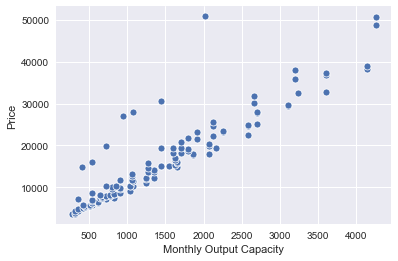

In [12]:
x = df['Monthly Output']
y = df['Price']
sns.scatterplot(x,y)
plt.xlabel("Monthly Output Capacity")
plt.ylabel("Price")

In [13]:
df['MOD OEM'].astype('category')

0               heliene
1      astronergy-solar
2      astronergy-solar
3               heliene
4                   rec
             ...       
115    astronergy-solar
116    astronergy-solar
117                 rec
118                 rec
119             heliene
Name: MOD OEM, Length: 120, dtype: category
Categories (3, object): [astronergy-solar, heliene, rec]

In [14]:
df.corr(method='pearson')

,Monthly Output,Price
Monthly Output,$1.00,$0.91
Price,$0.91,$1.00


In [15]:
def get_module_quantity(modules):
    modules.split()
    value = modules[0]
    return int(value)

In [16]:
df['Module Qty'] = df['Modules'].apply(get_module_quantity)

In [17]:
df = df.rename(columns=lambda x: x.strip())

In [18]:
df['INV OEM'] = df['INV OEM'].apply(lambda x: 'fronius' if x == '' else x)

In [19]:
df['INV OEM'].astype('category')

0        enphase
1        enphase
2            sma
3            sma
4            sma
         ...    
115    solaredge
116      enphase
117    solaredge
118      enphase
119      fronius
Name: INV OEM, Length: 120, dtype: category
Categories (5, object): [enphase, fronius, outback-power, sma, solaredge]

In [20]:
df['MOD OEM'].astype('category')

0               heliene
1      astronergy-solar
2      astronergy-solar
3               heliene
4                   rec
             ...       
115    astronergy-solar
116    astronergy-solar
117                 rec
118                 rec
119             heliene
Name: MOD OEM, Length: 120, dtype: category
Categories (3, object): [astronergy-solar, heliene, rec]

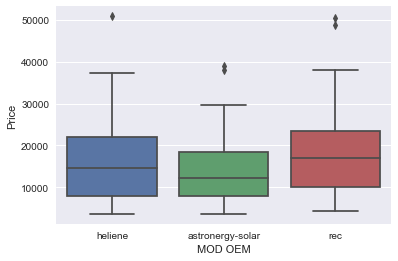

In [21]:
sns.boxplot(x='MOD OEM',y='Price',data=df)

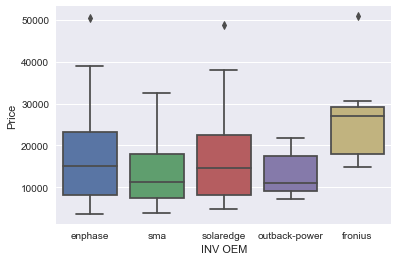

In [22]:
sns.boxplot(x='INV OEM',y='Price',data=df)

In [23]:
df.groupby(['INV OEM','MOD OEM']).size()

INV OEM        MOD OEM         
enphase        astronergy-solar    14
               heliene             14
               rec                 12
fronius        heliene              7
outback-power  heliene              6
                                   ..
sma            heliene             10
               rec                  6
solaredge      astronergy-solar    14
               heliene             15
               rec                 14
Length: 11, dtype: int64

In [24]:
df['INV OEM'].dropna

<bound method Series.dropna of 0        enphase
1        enphase
2            sma
3            sma
4            sma
         ...    
115    solaredge
116      enphase
117    solaredge
118      enphase
119      fronius
Name: INV OEM, Length: 120, dtype: object>

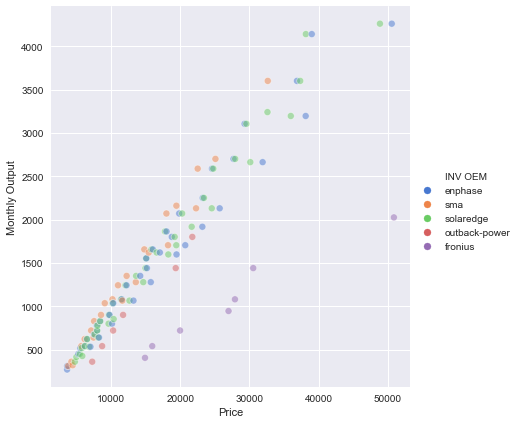

In [25]:
sns.relplot(x="Price", y="Monthly Output", hue="INV OEM", alpha=.5, palette="muted", 
            height=6, data=df)
plt.savefig('invoem.png')
plt.show()

In [26]:
Y = df['Price']
X = df['Monthly Output']
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              2087.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):                    2.67e-77
Time:                        15:11:47   Log-Likelihood:                         -1180.9
No. Observations:                 120   AIC:                                      2364.
Df Residuals:                     119   BIC:                                      2367.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Monthly Output    10.7829      0.236     45.683      0.000      10.316      11.250
==============================================================================
Omnibus:                      111.580   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1279.038
Skew:                           3.223   Prob(JB):                    1.82e-278
Kurtosis:                      17.637   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
def array_size(rating):
    rating.split()
    value = rating[0]
    return int(value)

In [28]:
df['Array Size'] = df['Array Size'].apply(array_size)

In [29]:
df.head()

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,MOD OEM,INV OEM,Module Qty
0,1.8 kW Grid Tied Solar System with Enphase IQ7...,1895201,1,$270.00,6 Heliene 300 Black Mono Panels,6 Enphase IQ7+ Micro Inverters,"$3,645.95",heliene,enphase,6
1,2.07 kW Grid Tied Solar System with Enphase IQ...,1895203,2,$310.50,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,6 Enphase IQ7+ Micro Inverters,"$3,664.00",astronergy-solar,enphase,6
2,Solar Sky 2.07 kW Grid Tied Solar System with ...,1892025,2,$310.50,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,1 SMA Sunny Boy 3.8-US Inverter,"$3,807.00",astronergy-solar,sma,6
3,SMA 2.4 kW Grid Tied Solar System with SMA Inv...,1892399,2,$360.00,8 Heliene 300 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,"$4,273.00",heliene,sma,8
4,SMA 2.13 kW Grid Tied Solar System with SMA In...,1892123,2,$319.50,6 REC 355 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,"$4,449.00",rec,sma,6


In [36]:
df.dtypes

System            object
SKU               object
Array Size        object
Monthly Output    object
Modules           object
Inverter          object
Price             object
MOD OEM           object
INV OEM           object
Module Qty        object
dtype: object

In [32]:
df['Monthly Output'] = df['Monthly Output'].astype('str').str.strip('$')
df['Price'] = df['Price'].astype('str').str.strip('$')
df['Module Qty'] = df['Module Qty'].astype('str').str.strip('$')
df['Array Size'] = df['Array Size'].astype('str').str.strip('$')

In [33]:
df['Monthly Output']

0       270.0
1       310.5
2       310.5
3       360.0
4       319.5
        ...  
115    4140.0
116    4140.0
117    4260.0
118    4260.0
119    2025.0
Name: Monthly Output, Length: 120, dtype: object

In [34]:
df

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,MOD OEM,INV OEM,Module Qty
0,1.8 kW Grid Tied Solar System with Enphase IQ7...,1895201,1,270.0,6 Heliene 300 Black Mono Panels,6 Enphase IQ7+ Micro Inverters,3645.95,heliene,enphase,6
1,2.07 kW Grid Tied Solar System with Enphase IQ...,1895203,2,310.5,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,6 Enphase IQ7+ Micro Inverters,3664.0,astronergy-solar,enphase,6
2,Solar Sky 2.07 kW Grid Tied Solar System with ...,1892025,2,310.5,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,1 SMA Sunny Boy 3.8-US Inverter,3807.0,astronergy-solar,sma,6
3,SMA 2.4 kW Grid Tied Solar System with SMA Inv...,1892399,2,360.0,8 Heliene 300 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,4273.0,heliene,sma,8
4,SMA 2.13 kW Grid Tied Solar System with SMA In...,1892123,2,319.5,6 REC 355 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,4449.0,rec,sma,6
...,...,...,...,...,...,...,...,...,...,...
115,27.6 kW Grid Tied Solar System with SolarEdge ...,1890941,2,4140.0,80 Astronergy Solar CHSM6612P/HV-345 Silver Po...,2 SolarEdge SE11400H HD Wave SetApp Enabled In...,38145.0,astronergy-solar,solaredge,8
116,27.6 kW Grid Tied Solar System with Enphase IQ...,1894379,2,4140.0,80 Astronergy Solar CHSM6612P/HV-345 Silver Po...,80 Enphase IQ7+ Micro Inverters,39003.0,astronergy-solar,enphase,8
117,28.4 kW Grid Tied Solar System with SolarEdge ...,1891611,2,4260.0,80 REC 355 Black Mono Panels,3 SolarEdge SE10000H HD-Wave SetApp Enabled In...,48852.0,rec,solaredge,8
118,28.4 kW Grid Tied Solar System with Enphase IQ...,1895480,2,4260.0,80 REC 355 Black Mono Panels,80 Enphase IQ7A Micro Inverters,50560.0,rec,enphase,8


In [35]:
lm = sns.lmplot(x=df['Monthly Output'],y=df['Price'])
lm

TypeError: lmplot() missing 1 required positional argument: 'data'